# Tulin: Autosave, Tensorboard, Export

In [2]:
import datetime 
print('2019-10-01')
print(str(datetime.datetime.now().isoformat()))

2019-10-01
2019-10-03T18:39:56.049937


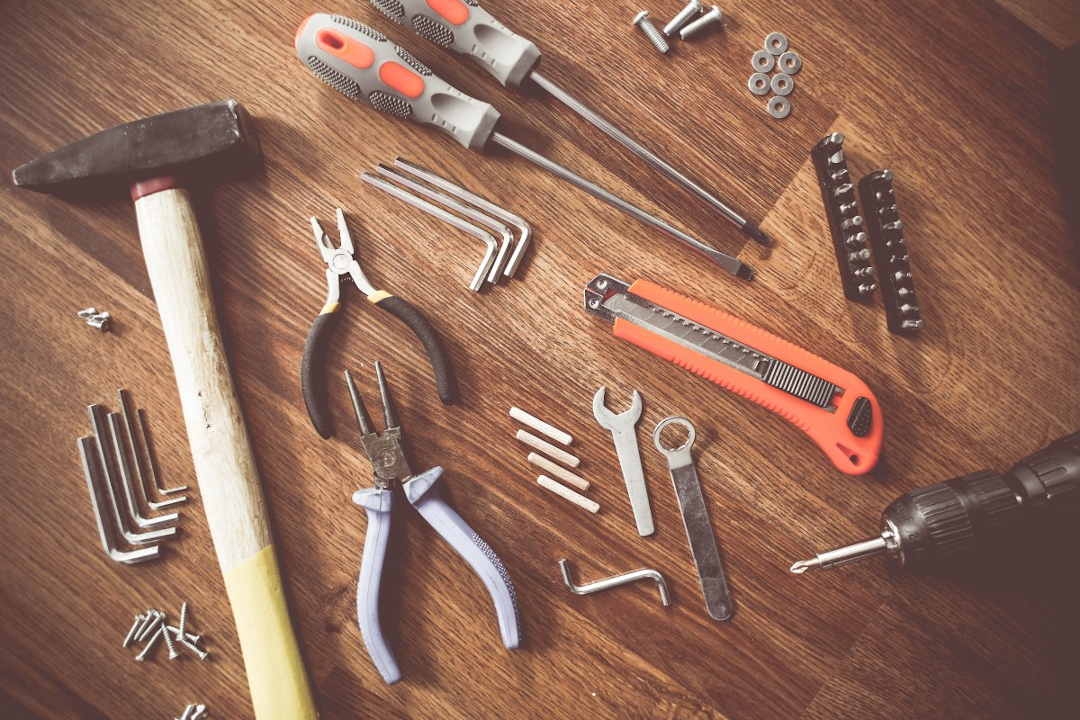

In [1]:
from IPython.display import Image
Image(filename='blog.jpg') 

## Abstract

Tulin is a pip installable collection of small tools and libraries to help expedite the machine learning workflow. At present, centered around fastai, current features include a callback that supports autosave and Tensorboard logging, as well as Jupyter based application development support in the form of an exporter that converts Jupyter notebooks into Python code.

## Motivation
Machine learning and it's tooling support is still in it's early stages. Over the course of development, scripts that were written as one off helper functions may become used over and over. There was a need to consolidate these tools and create a platform that allowed for the easy collection, implementation and usage of these tools. Tulin is a pip installable collection of such scripts. 

## Design
Most design aspects of thee functionality in the scripts are centered around `fastai` and it's development worksflows. fastai has an excellent callback system which allows for almost any functionality to be effectively (and in an officially supported way) monkey patched into it's workflow. In addition, Tulin includes an `Export` script that copies another fastai workflow - converting Jupyter notebooks into Python libraries and applications. This allows Jupyter notebook users to build and experiment with code in a notebook and then convert the relevant cells of those notebooks into Python scripts. 

## FastAI Callback

### Autosave
The autosave functionality of the fastai callback allows the user to specify a "primary metric" - a metric used with the fastai learner. The callback then keeps track of that value of the meteric each epoch. If the new value is better than the last best value, the value is updated and the model is saved along with information about the meteric and the epoch it happened. This not only allows for the best network to be saved but also helps guide in determining the number of epochs to use. 

### Tensorboard
In addition to tracking the primary meteric, the callback logs all meterics to Tensorboard using the [official support built into PyTorch 1.2+](https://pytorch.org/docs/stable/tensorboard.html), which eliminates the need for TensorboardX. The current official fastai implementation of Tensorboard relies on TensorboardX, so this implementation was created to use the latest and direct method of PyTorch/Tensorboard logging.

## Export
Inspired by Sylvain Gugger and Jeremy Howard's [implementation in fastai-dev](https://github.com/fastai/fastai_dev/blob/master/dev/91_notebook_export.ipynb), the Export functionality allows development to be done in Jupyter notebooks for complex libraries and applications in a experimental manner. 

The export script looks for cells that need to be exported (which containe the comment `#export` at the top of the cell) and generates a Python file from the notebook. Additionally, to allow for the notebook to import files generated from other notebooks, packages are imported from the output folder i.e. `import src.<package>`. The exporter script changes these values to `import .<package>` so scripts in the output folder also import from the output folder. The Export script takes fastai's implementation one step further by being implemented as a pip installable library, so that any notebook folder can run the export script and generate Python code from it.

Note, because the export script relies on relative paths, launching entrypoint scripts in the tradition manner (i.e. file has `if __name__ == __main__` and `python app.py`) does not work. This is because relative imports use the name to determine relativity but when launched this way with Python,`__name__` is set to `__main__` to denote it as the entry script. Instead, to launch your entry script, use the module method of invocation: `python -m src.app` - this must be done from outside the src folder (which is now being treated as a module). 

## Installation
As of this update, Tulin is intended to be installed as an editable package. The install bash script in the src folder handles this for us: 

In [6]:
#code-show-input-output
print(open('src/install.sh').read())

pip install -e . --user


## Usage
The fastai callback and then be appended to the fastai learner:
```
from tulin.fastai import Callback
learner.callbacks.append(Callback(learner, "<primary metric>", "<experiment name>", "<experiment comments>"))
```

The exporter should be executed using Python and the `-m` flag in the directory you wish to export:
```
python -m tulin.scripts.export
```